# Hoja de trabajo 5
## Ricardo Rodríguez

In [2]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def proceso(nombre, memoria, instrucciones, llegada, env, ram, cpu, ciclo, contador, lista):
    yield env.timeout(llegada)
    tiempo_inicio = env.now
    
    while instrucciones > 0:
        if ram.level >= memoria:
            yield ram.get(memoria)

            while instrucciones > 0:
                with cpu.request() as turno:
                    yield turno
                    yield env.timeout(1)
                    instrucciones -= ciclo
                    decision = random.randint(1, 2)
                        
                if decision == 1 and instrucciones > 0:
                    yield env.timeout(1)
                else:
                    pass
                    
                if instrucciones <= 0:
                    yield ram.put(memoria)
        else:
            yield env.timeout(1)

    tiempoProceso = env.now - tiempo_inicio
    lista[contador].append(tiempoProceso)    

###  Con intervalos de llegada de 10

In [5]:
random.seed(20)
intervalo = 10
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=100, capacity =100)
    cpu = simpy.Resource(env, capacity = 1)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 3, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [6]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  3.6359320095528362
La desviación estándar es de  2.573471977052079 

El tiempo promedio con  50  procesos es de  3.9911486207125804
La desviación estándar es de  1.9225934000704878 

El tiempo promedio con  100  procesos es de  3.590242612163399
La desviación estándar es de  2.323071740138944 

El tiempo promedio con  150  procesos es de  3.3079207873092735
La desviación estándar es de  1.8085160314655413 

El tiempo promedio con  200  procesos es de  3.4480913711027346
La desviación estándar es de  2.0457516557385222 



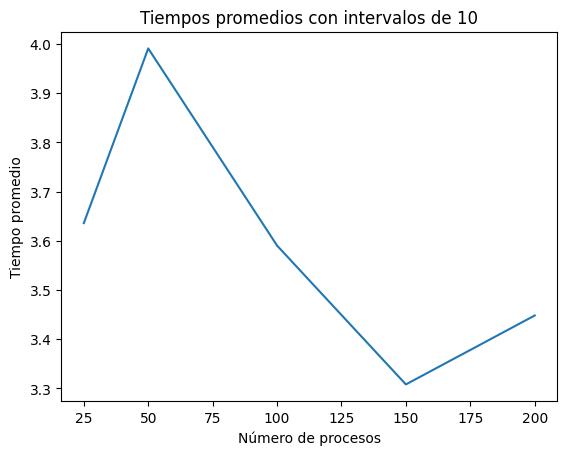

In [7]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con intervalos de 10")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Con intervalos de llegada de 5

In [9]:
random.seed(20)
intervalo = 5
procesos = [25, 50, 100, 150, 200]
tiempos1 = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=100, capacity =100)
    cpu = simpy.Resource(env, capacity = 1)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 3, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [10]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  4.224738141190409
La desviación estándar es de  2.9674376169868184 

El tiempo promedio con  50  procesos es de  5.141934414741054
La desviación estándar es de  3.760137272316081 

El tiempo promedio con  100  procesos es de  4.22511022455847
La desviación estándar es de  3.1931942919042853 

El tiempo promedio con  150  procesos es de  3.7768477758077665
La desviación estándar es de  2.3533761404265956 

El tiempo promedio con  200  procesos es de  4.00383595502064
La desviación estándar es de  2.8798620063297458 



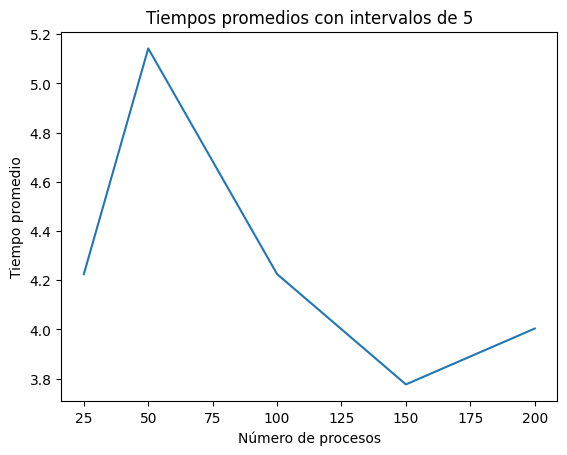

In [11]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con intervalos de 5")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Con intervalos de llegada de 1

In [13]:
random.seed(20)
intervalo = 1
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=100, capacity =100)
    cpu = simpy.Resource(env, capacity = 1)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 3, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [14]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  21.956570396700158
La desviación estándar es de  13.732681352135609 

El tiempo promedio con  50  procesos es de  50.35285912165539
La desviación estándar es de  26.72321592817357 

El tiempo promedio con  100  procesos es de  81.5747683250685
La desviación estándar es de  49.37637751651692 

El tiempo promedio con  150  procesos es de  110.82736641283509
La desviación estándar es de  75.5639584037119 

El tiempo promedio con  200  procesos es de  134.6477471567847
La desviación estándar es de  104.12397110998948 



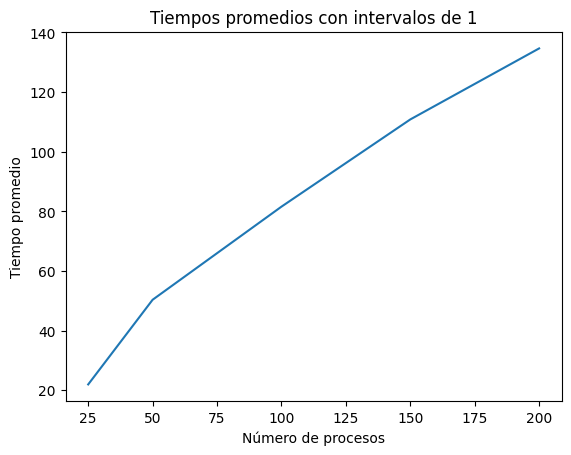

In [15]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con intervalos de 1")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Aumentar la memoria a 200 e intervalos de llegada 10

In [17]:
random.seed(20)
intervalo = 10
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=200, capacity =200)
    cpu = simpy.Resource(env, capacity = 1)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 3, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [18]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  3.6359320095528362
La desviación estándar es de  2.573471977052079 

El tiempo promedio con  50  procesos es de  3.9911486207125804
La desviación estándar es de  1.9225934000704878 

El tiempo promedio con  100  procesos es de  3.590242612163399
La desviación estándar es de  2.323071740138944 

El tiempo promedio con  150  procesos es de  3.3079207873092735
La desviación estándar es de  1.8085160314655413 

El tiempo promedio con  200  procesos es de  3.4480913711027346
La desviación estándar es de  2.0457516557385222 



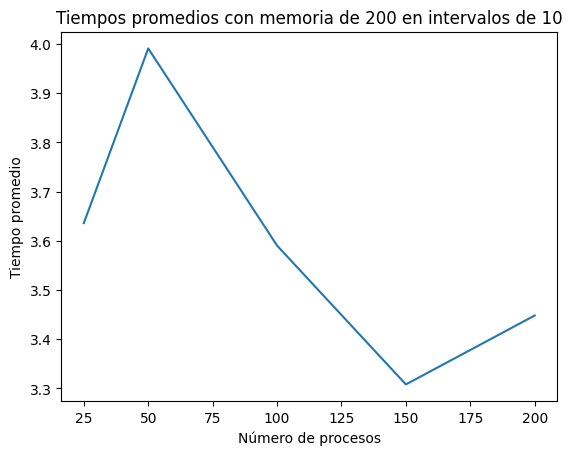

In [19]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con memoria de 200 en intervalos de 10")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Aumentar la memoria a 200 e intervalos de llegada 5

In [21]:
random.seed(20)
intervalo = 5
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=200, capacity =200)
    cpu = simpy.Resource(env, capacity = 1)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 3, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [22]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  4.81354427282798
La desviación estándar es de  3.2086178774413874 

El tiempo promedio con  50  procesos es de  6.292720208769526
La desviación estándar es de  4.683191576676226 

El tiempo promedio con  100  procesos es de  4.859977836953542
La desviación estándar es de  3.7669886502791052 

El tiempo promedio con  150  procesos es de  4.24577476430626
La desviación estándar es de  2.7140823936472445 

El tiempo promedio con  200  procesos es de  4.559580538938545
La desviación estándar es de  3.4328423250912796 



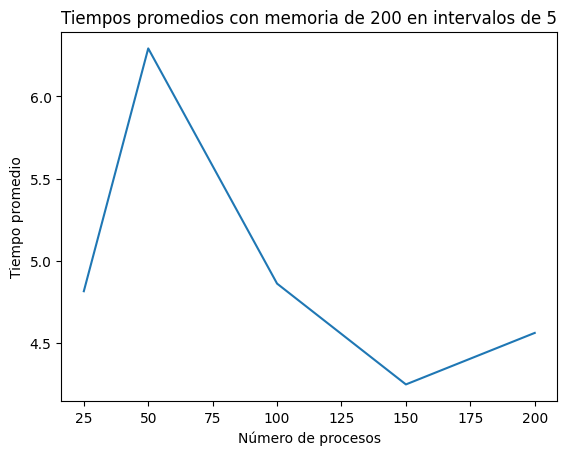

In [23]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con memoria de 200 en intervalos de 5")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Aumentar la memoria a 200 e intervalos de llegada 1

In [25]:
random.seed(20)
intervalo = 1
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=200, capacity =200)
    cpu = simpy.Resource(env, capacity = 1)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 3, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [26]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  21.956570396700158
La desviación estándar es de  13.732681352135609 

El tiempo promedio con  50  procesos es de  51.91285912165538
La desviación estándar es de  28.965464288590702 

El tiempo promedio con  100  procesos es de  89.13476832506849
La desviación estándar es de  47.4930700378529 

El tiempo promedio con  150  procesos es de  120.43403307950177
La desviación estándar es de  67.06442217525604 

El tiempo promedio con  200  procesos es de  142.41774715678474
La desviación estándar es de  96.61330549729625 



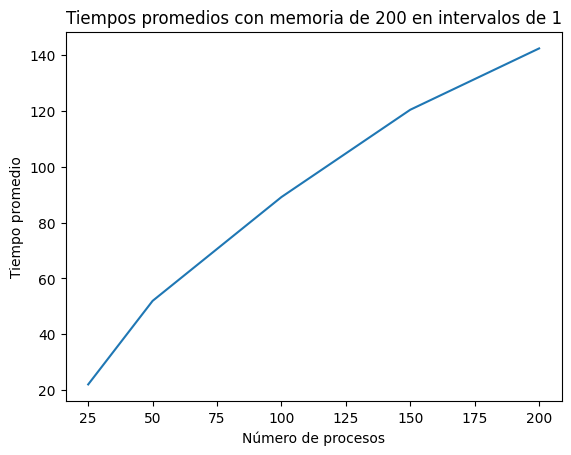

In [27]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con memoria de 200 en intervalos de 1")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Ejecutar 6 instrucciones por unidad de tiempo e intervalos de llegada 10

In [29]:
random.seed(20)
intervalo = 10
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=100, capacity =100)
    cpu = simpy.Resource(env, capacity = 1)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 6, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [30]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  1.8502108903117978
La desviación estándar es de  0.9538409965339214 

El tiempo promedio con  50  procesos es de  1.9041754747697954
La desviación estándar es de  0.9874937987479625 

El tiempo promedio con  100  procesos es de  2.0154395957632336
La desviación estándar es de  1.0917349370207055 

El tiempo promedio con  150  procesos es de  1.7599907756340856
La desviación estándar es de  0.9136659379437895 

El tiempo promedio con  200  procesos es de  1.728709215730484
La desviación estándar es de  1.0004374108995737 



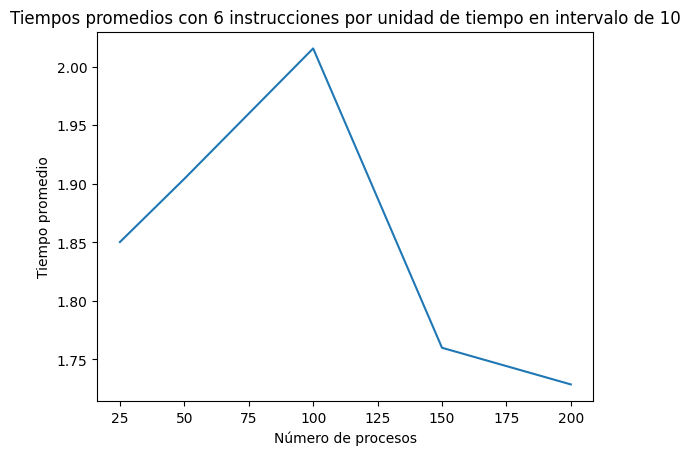

In [31]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con 6 instrucciones por unidad de tiempo en intervalo de 10")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Ejecutar 6 instrucciones por unidad de tiempo e intervalos de llegada 5

In [33]:
random.seed(20)
intervalo = 5
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=100, capacity =100)
    cpu = simpy.Resource(env, capacity = 1)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 6, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [34]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  2.1481278030246016
La desviación estándar es de  1.4017052369500806 

El tiempo promedio con  50  procesos es de  2.2750841088417335
La desviación estándar es de  1.2042174400429686 

El tiempo promedio con  100  procesos es de  2.374189542173882
La desviación estándar es de  1.4060535697792769 

El tiempo promedio con  150  procesos es de  1.9978577977176444
La desviación estándar es de  1.0851043806136802 

El tiempo promedio con  200  procesos es de  1.982832958503829
La desviación estándar es de  1.3526104232467073 



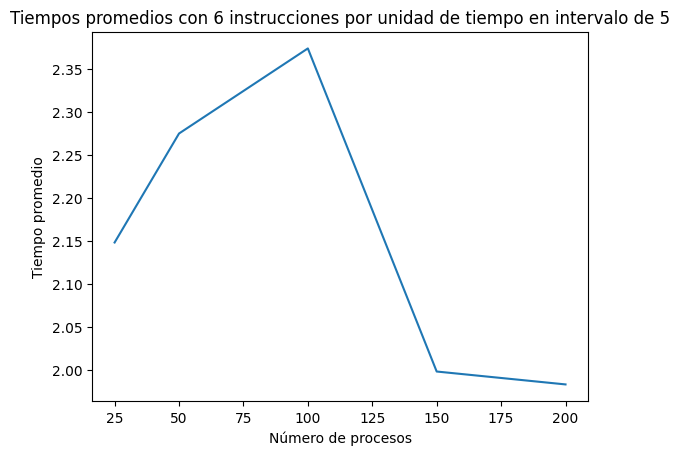

In [35]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con 6 instrucciones por unidad de tiempo en intervalo de 5")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Ejecutar 6 instrucciones por unidad de tiempo e intervalos de llegada 1

In [37]:
random.seed(20)
intervalo = 1
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=100, capacity =100)
    cpu = simpy.Resource(env, capacity = 1)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 6, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [38]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  8.99262280768107
La desviación estándar es de  5.259296127173529 

El tiempo promedio con  50  procesos es de  17.647896100627428
La desviación estándar es de  12.258916553089518 

El tiempo promedio con  100  procesos es de  34.868980046922836
La desviación estándar es de  22.63928678292055 

El tiempo promedio con  150  procesos es de  37.12306798865902
La desviación estándar es de  28.983228953325032 

El tiempo promedio con  200  procesos es de  38.28184098032476
La desviación estándar es de  31.562989532714656 



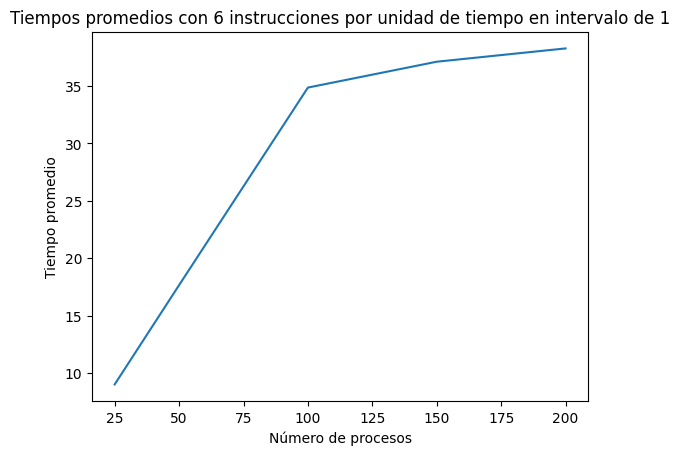

In [39]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con 6 instrucciones por unidad de tiempo en intervalo de 1")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Dos procesdadores e intervalos de llegada 10

In [41]:
random.seed(20)
intervalo = 10
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=100, capacity =100)
    cpu = simpy.Resource(env, capacity = 2)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 3, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [42]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  2.9116950025427206
La desviación estándar es de  1.8786992295514953 

El tiempo promedio con  50  procesos es de  3.250960203740284
La desviación estándar es de  1.5300786394338988 

El tiempo promedio con  100  procesos es de  2.9757404444138715
La desviación estándar es de  1.711864037558474 

El tiempo promedio con  150  procesos es de  2.84896997715051
La desviación estándar es de  1.469139139311133 

El tiempo promedio con  200  procesos es de  2.9119646819430636
La desviación estándar es de  1.5733597532690649 



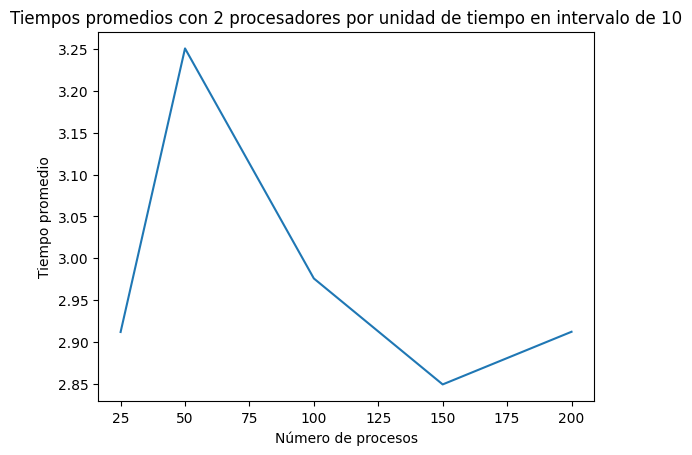

In [43]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con 2 procesadores por unidad de tiempo en intervalo de 10")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Dos procesdadores e intervalos de llegada 5

In [45]:
random.seed(20)
intervalo = 5
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=100, capacity =100)
    cpu = simpy.Resource(env, capacity = 2)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 3, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [46]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  3.1238421132709084
La desviación estándar es de  2.05511844850593 

El tiempo promedio con  50  procesos es de  3.4337839619506996
La desviación estándar es de  1.6074846906371196 

El tiempo promedio con  100  procesos es de  3.0909259369819164
La desviación estándar es de  1.794428479172718 

El tiempo promedio con  150  procesos es de  2.932021243413433
La desviación estándar es de  1.5449593039929574 

El tiempo promedio con  200  procesos es de  3.1074861851684994
La desviación estándar es de  1.7218806127316442 



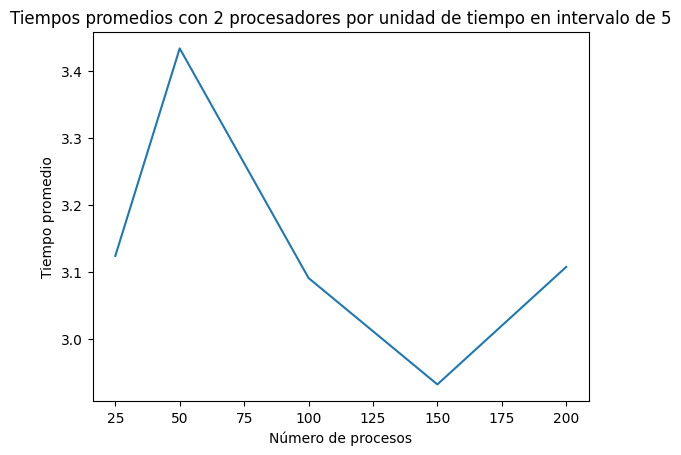

In [47]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con 2 procesadores por unidad de tiempo en intervalo de 5")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()

### Dos procesdadores e intervalos de llegada 1

In [49]:
random.seed(20)
intervalo = 1
procesos = [25, 50, 100, 150, 200]
tiempos = [[], [], [], [], []]
cont = 0
for j in procesos:
    llegadas = 0
    env = simpy.Environment()
    ram = simpy.Container(env, init=100, capacity =100)
    cpu = simpy.Resource(env, capacity = 2)
    for i in range(j):
        llegadas += random.expovariate(1.0/intervalo)
        env.process(proceso('Proceso %d'%i, random.randint(1, 10), random.randint(1, 10), llegadas, env, ram, cpu, 3, cont, tiempos))
    env.run(until=20*j)
    cont += 1

In [50]:
tiempos_promedio = []
desviacion_std = []
for i in range(len(tiempos)):
    tiempos_promedio.append(np.mean(tiempos[i]))
    desviacion_std.append(np.std(tiempos[i]))
    print("El tiempo promedio con ", procesos[i], " procesos es de ", tiempos_promedio[i])
    print("La desviación estándar es de ", desviacion_std[i], '\n')

El tiempo promedio con  25  procesos es de  7.049761085066409
La desviación estándar es de  4.589289131318964 

El tiempo promedio con  50  procesos es de  16.012411287789757
La desviación estándar es de  9.395001760218644 

El tiempo promedio con  100  procesos es de  20.6635748774605
La desviación estándar es de  12.796546075484065 

El tiempo promedio con  150  procesos es de  22.100722245847123
La desviación estándar es de  15.990032156526999 

El tiempo promedio con  200  procesos es de  26.573380251079968
La desviación estándar es de  23.96965452201412 



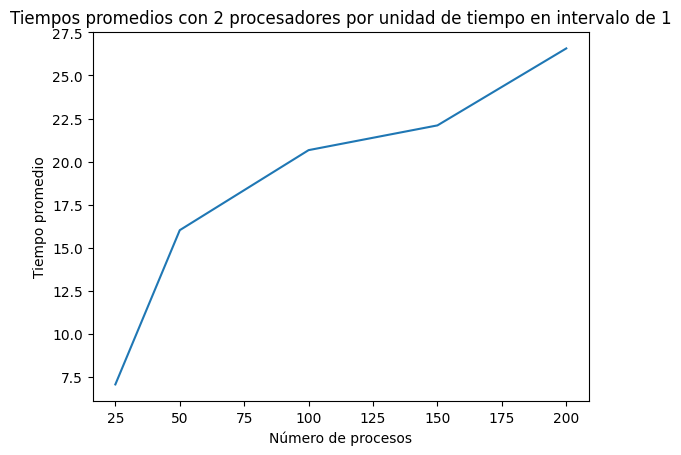

In [51]:
plt.plot(procesos, tiempos_promedio)
plt.title("Tiempos promedios con 2 procesadores por unidad de tiempo en intervalo de 1")
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo promedio")
plt.show()